In [ ]:
#!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#Start form here


In [ ]:
!kaggle datasets download -d olistbr/brazilian-ecommerce --unzip


Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
 82% 35.0M/42.6M [00:00<00:00, 95.3MB/s]
100% 42.6M/42.6M [00:00<00:00, 92.7MB/s]


In [ ]:
import os
print(os.listdir())

['.config', 'olist_order_payments_dataset.csv', 'olist_customers_dataset.csv', 'product_category_name_translation.csv', 'olist_orders_dataset.csv', 'olist_products_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_sellers_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_reviews_dataset.csv', 'sample_data']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
customers = pd.read_csv("olist_customers_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
product_category_name = pd.read_csv("product_category_name_translation.csv")
order_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Explore the datasets

In [ ]:
df = pd.merge(orders, customers, on="customer_id", how="inner")
df = pd.merge(df, order_items, on="order_id", how="inner")
df = pd.merge(df, products, on="product_id", how="inner")
df = pd.merge(df, sellers, on="seller_id", how="inner")
df = pd.merge(df, payments, on="order_id", how="inner")
df = pd.merge(df, order_reviews, on="order_id", how="left")
df = pd.merge(df, product_category_name, on="product_category_name", how="left")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto


In [ ]:
orders.iloc[300]

,300
order_id,4570fa83dbb31a563e06db0a554b951e
customer_id,cdfe21141f5df77ba0fb20bef6621a9f
order_status,delivered
order_purchase_timestamp,2018-03-15 20:23:45
order_approved_at,2018-03-16 20:31:55
order_delivered_carrier_date,2018-03-20 23:42:44
order_delivered_customer_date,2018-03-29 19:22:10
order_estimated_delivery_date,2018-04-06 00:00:00


In [ ]:
orders.info()  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders.describe()  # Summary statistics

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
orders.isnull().sum()  # Check for missing values

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
orders.shape

(99441, 8)

In [ ]:
orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

 Basic Data Analysis

In [ ]:
print(orders.loc[orders["order_status"]=="delivered","order_status"].count(),"delivered orders")
print(orders.loc[orders["order_status"]=="canceled","order_status"].count(), "canceled orders")
print(orders.loc[orders["order_status"]=="unavailable","order_status"].count(), "unavailable orders")
print(orders.loc[orders["order_status"]=="shipped","order_status"].count(), "shipped orders")
print(orders.loc[orders["order_status"]=="created","order_status"].count(), "created orders")
print(orders.loc[orders["order_status"]=="invoiced","order_status"].count(), "invoiced orders")


96478 delivered orders
625 canceled orders
609 unavailable orders
1107 shipped orders
5 created orders
314 invoiced orders


In [ ]:
customers['customer_id'].nunique()

99441

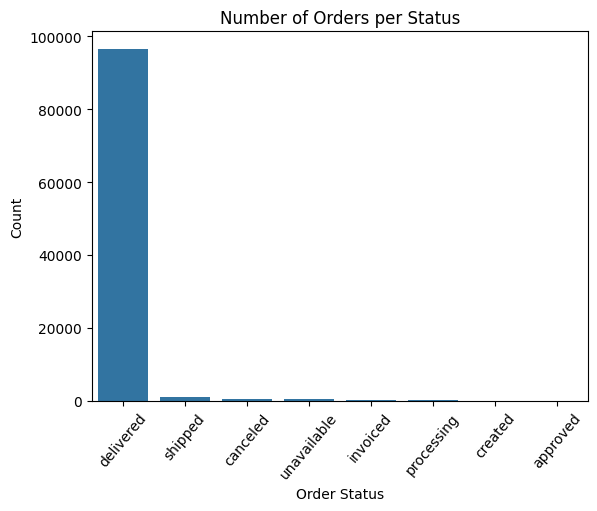

In [ ]:
order_status_counts = orders["order_status"].value_counts()
sns.barplot(x=order_status_counts.index, y=order_status_counts.values)
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.title("Number of Orders per Status")
plt.xticks(rotation=50)
plt.show()

In [ ]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


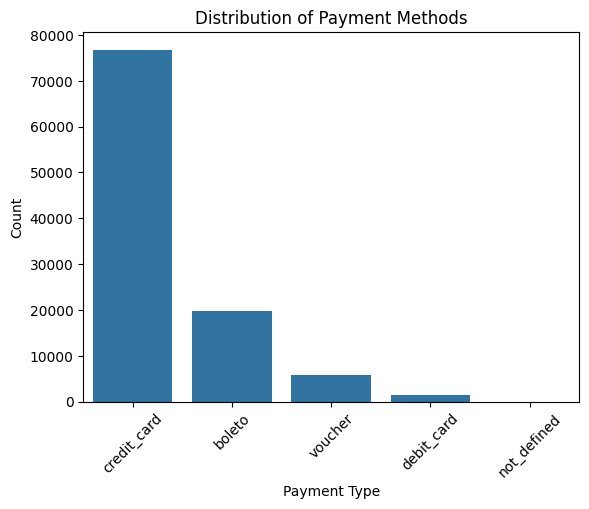

In [ ]:
payment_counts = payments["payment_type"].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values)
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Payment Methods")
plt.xticks(rotation=45)
plt.show()

In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products['product_category_name'].value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


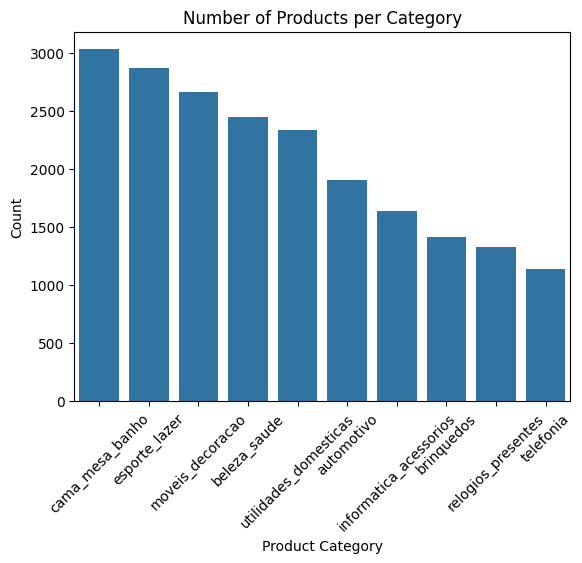

In [ ]:
total_products = products['product_category_name'].value_counts().head(10)
sns.barplot(x=total_products.index, y=total_products.values)
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.title("Number of Products per Category")
plt.xticks(rotation=45)
plt.show();

In [ ]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [ ]:
payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

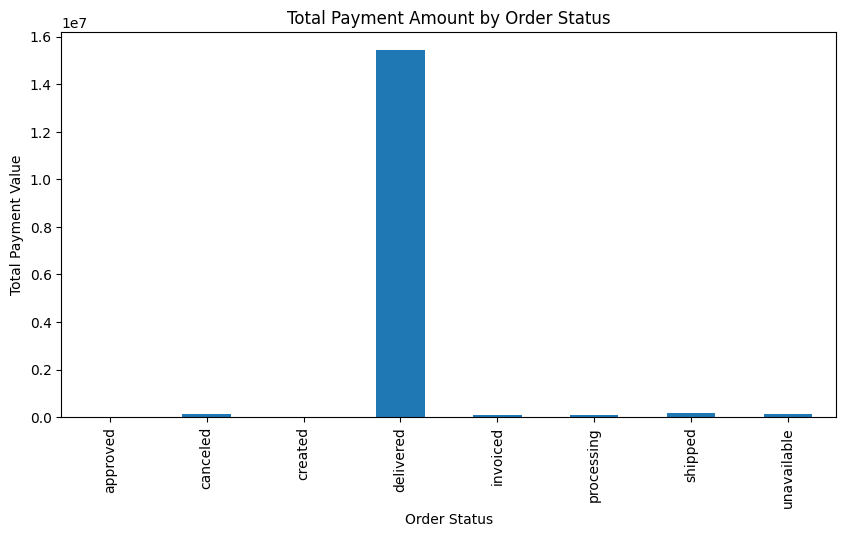

In [ ]:
order_payments = pd.merge(orders, payments, on="order_id", how="inner")
order_payments.groupby("order_status")["payment_value"].sum().plot(kind="bar", figsize=(10, 5))
plt.xlabel("Order Status")
plt.ylabel("Total Payment Value")
plt.title("Total Payment Amount by Order Status")
plt.show()



In [ ]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
payments.groupby("payment_type")["payment_value"].sum()

,payment_value
payment_type,
boleto,2869361.27
credit_card,12542084.19
debit_card,217989.79
not_defined,0.00
voucher,379436.87


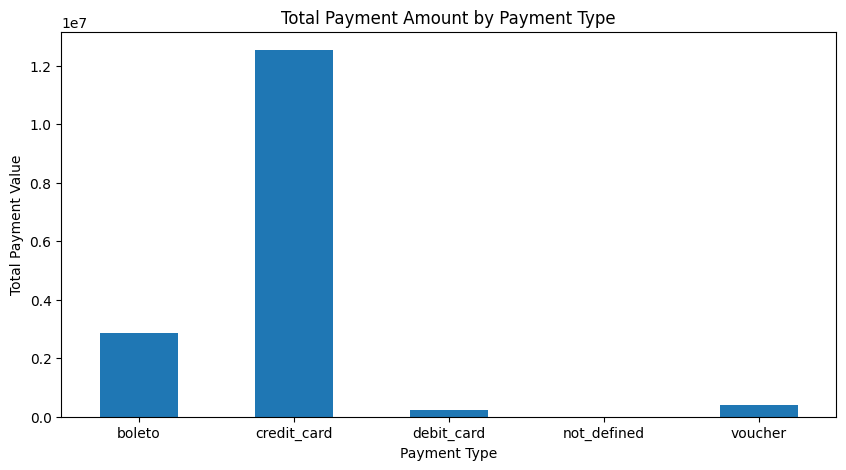

In [ ]:
payments.groupby("payment_type")["payment_value"].sum().plot(kind="bar", figsize=(10, 5))
plt.xlabel("Payment Type")
plt.ylabel("Total Payment Value")
plt.title("Total Payment Amount by Payment Type")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#products.head()

In [ ]:
#payments.head()

In [ ]:
order_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
order_payments_customers = pd.merge(order_payments, customers, on="customer_id", how="inner")

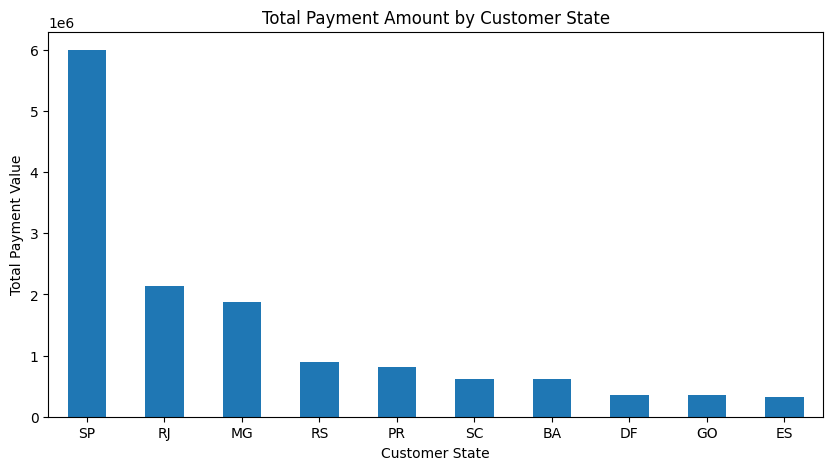

In [ ]:
order_payments_customers.groupby("customer_state")["payment_value"].sum().sort_values(ascending=False).head(10).plot(kind="bar", figsize=(10, 5))
plt.xlabel("Customer State")
plt.ylabel("Total Payment Value")
plt.title("Total Payment Amount by Customer State")
plt.xticks(rotation=0)
plt.show()

In [ ]:
order_payments_customers.groupby("customer_state")["payment_value"].sum().sort_values(ascending=False)

,payment_value
customer_state,
SP,5998226.96
RJ,2144379.69
MG,1872257.26
RS,890898.54
PR,811156.38
SC,623086.43
BA,616645.82
DF,355141.08
GO,350092.31


In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
#df.isnull().sum()

In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto


In [ ]:
df['total_order_value'] = df['price'] + df['freight_value']
df['gross_profit'] = df['payment_value']- df['total_order_value']
df['profit_margin'] = df['gross_profit']/df['payment_value']
df['volume'] = df['product_height_cm']*df['product_length_cm']*df['product_width_cm']
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,total_order_value,gross_profit,profit_margin,volume
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,38.71,-20.59,-1.136313,1976.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,38.71,-36.71,-18.355000,1976.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,38.71,-20.12,-1.082302,1976.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery,141.46,0.00,0.000000,4693.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto,179.12,0.00,0.000000,9576.0


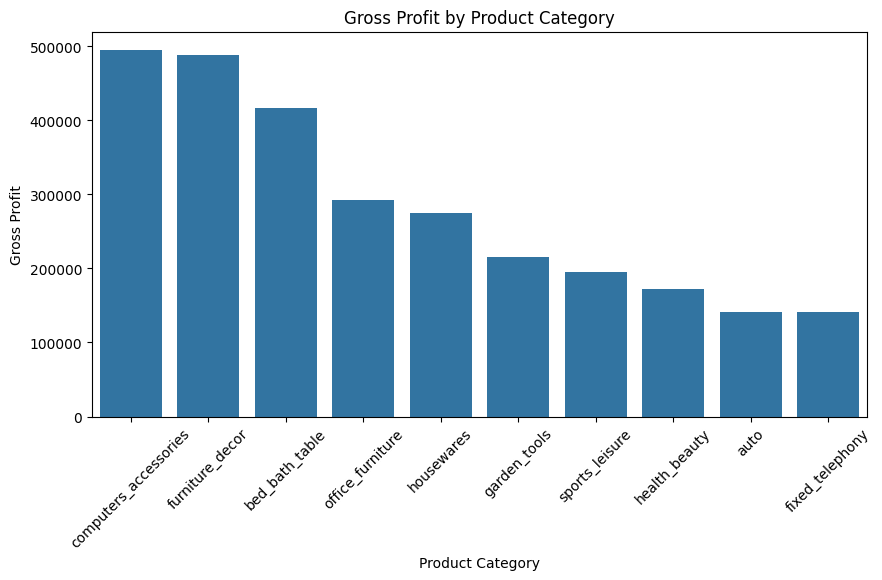

In [ ]:
profit_per_product=df.groupby("product_category_name_english")["gross_profit"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=profit_per_product.index, y=profit_per_product.values)
plt.xlabel("Product Category")
plt.ylabel("Gross Profit")
plt.title("Gross Profit by Product Category")
plt.xticks(rotation=45)
plt.show()

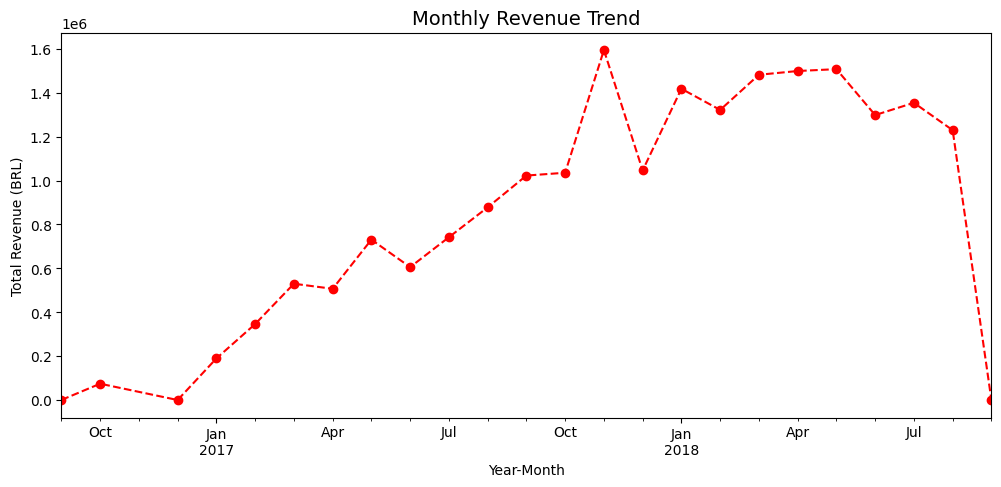

In [ ]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["year_month"] = df["order_purchase_timestamp"].dt.to_period("M")

monthly_revenue = df.groupby("year_month")["payment_value"].sum()

plt.figure(figsize=(12, 5))
monthly_revenue.plot(marker="o", linestyle="--", color="red")
plt.title("Monthly Revenue Trend", fontsize=14)
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue (BRL)")
plt.xticks(rotation=0)
plt.show()

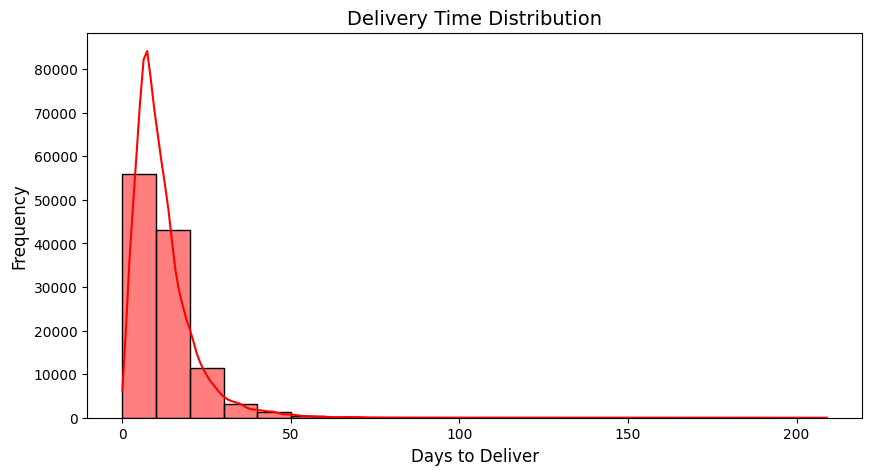

In [ ]:
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["delivery_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

plt.figure(figsize=(10, 5))
sns.histplot(df["delivery_time"].dropna(), bins=np.arange(0,70,10), kde=True, color="red")
plt.title("Delivery Time Distribution", fontsize=14)
plt.xlabel("Days to Deliver",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.show()


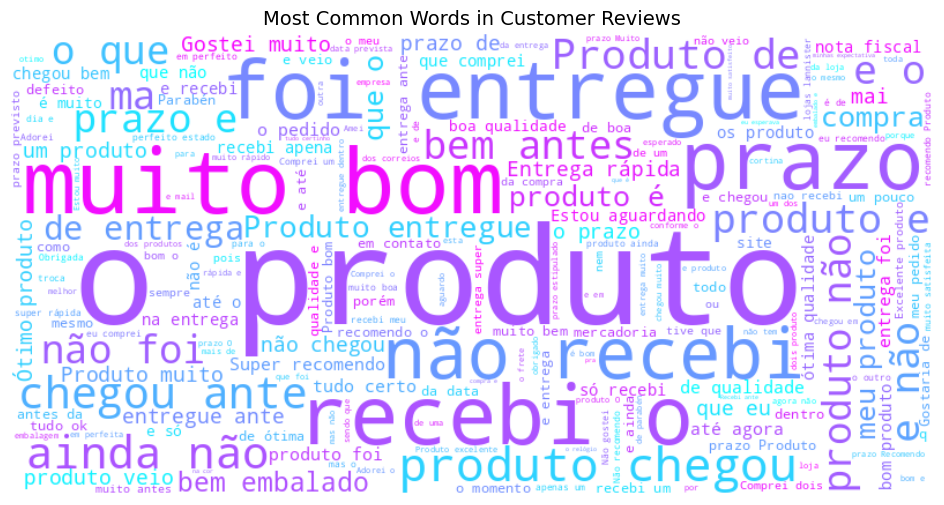

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud

text = " ".join(review for review in df["review_comment_message"].dropna())

plt.figure(figsize=(12, 6))
# Now WordCloud is defined and can be used
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="cool").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Customer Reviews", fontsize=14)
plt.show()


<ipython-input-41-8b1658234ff4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_delivery.index, y=state_delivery.values, palette="coolwarm")


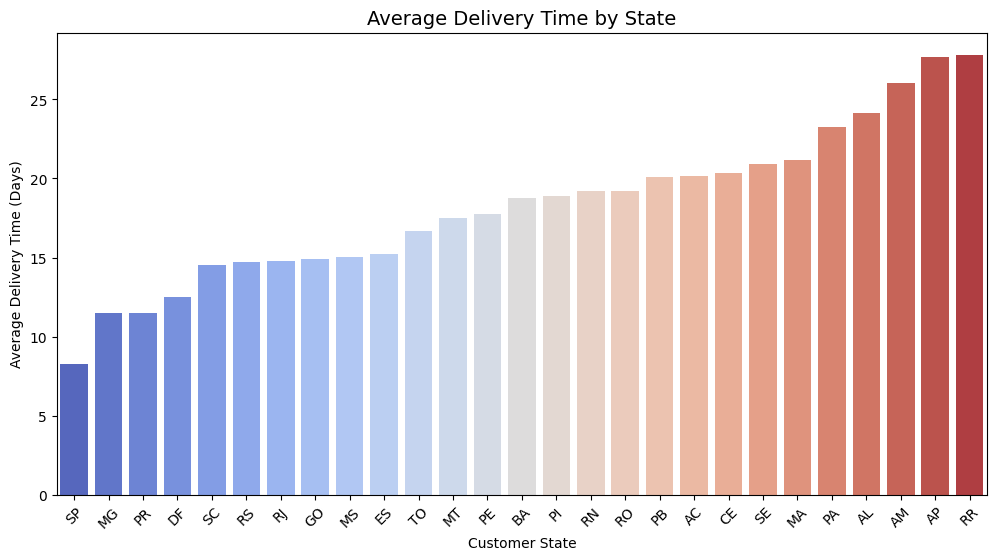

In [ ]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])

df["delivery_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
# average delivery time
state_delivery = df.groupby("customer_state")["delivery_time"].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_delivery.index, y=state_delivery.values, palette="coolwarm")

plt.xticks(rotation=45)
plt.xlabel("Customer State")
plt.ylabel("Average Delivery Time (Days)")
plt.title("Average Delivery Time by State", fontsize=14)
plt.show()



In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english,total_order_value,gross_profit,profit_margin,volume,year_month,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,38.71,-20.59,-1.136313,1976.0,2017-10,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,38.71,-36.71,-18.355000,1976.0,2017-10,8.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares,38.71,-20.12,-1.082302,1976.0,2017-10,8.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery,141.46,0.00,0.000000,4693.0,2018-07,13.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto,179.12,0.00,0.000000,9576.0,2018-08,9.0


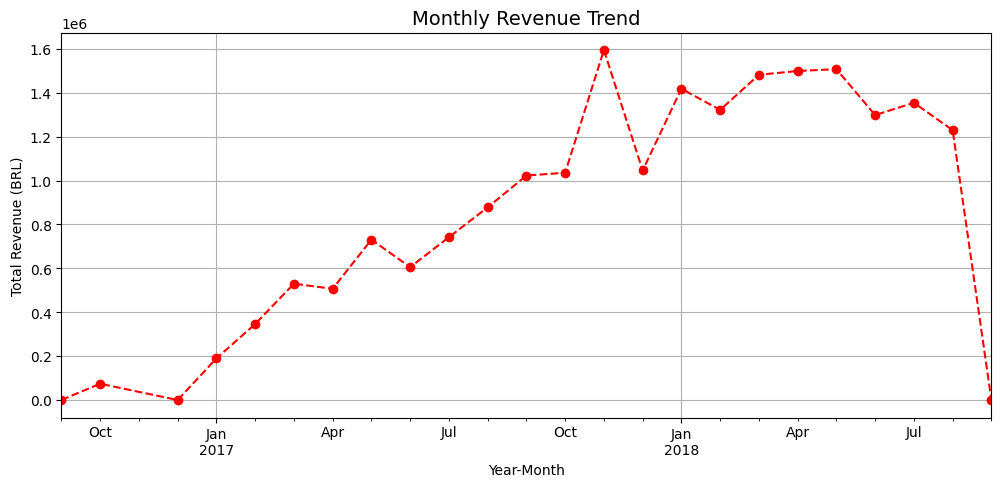

In [ ]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

df["year_month"] = df["order_purchase_timestamp"].dt.to_period("M")
monthly_sales = df.groupby("year_month")["payment_value"].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(marker="o", linestyle="--", color="red")
plt.title("Monthly Revenue Trend", fontsize=14)
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue (BRL)")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()



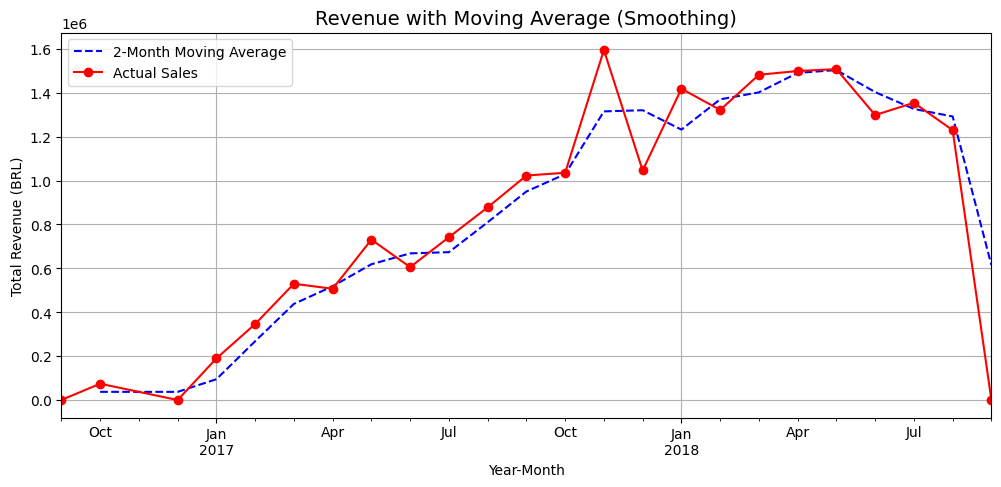

In [ ]:
plt.figure(figsize=(12, 5))

# Calculate Moving Averages imp new
monthly_sales.rolling(window=2).mean().plot(label="2-Month Moving Average", linestyle="--", color="blue")
monthly_sales.plot(marker="o", linestyle="-", color="red", label="Actual Sales")

plt.title("Revenue with Moving Average (Smoothing)", fontsize=14)
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue (BRL)")
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df_time_series = monthly_sales.reset_index()
df_time_series["year_month"] = df_time_series["year_month"].astype(str)
df_time_series["year_month"] = pd.to_datetime(df_time_series["year_month"])

df_time_series["date_int"] = df_time_series["year_month"].astype(int) // 10**9

X = df_time_series["date_int"].values.reshape(-1, 1)  # Feature
y = df_time_series["payment_value"].values  # Target (Revenue)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model Performance:\nMAE: {mae:.2f}, RMSE: {rmse:.2f}")


Model Performance:
MAE: 227717.88, RMSE: 247862.54


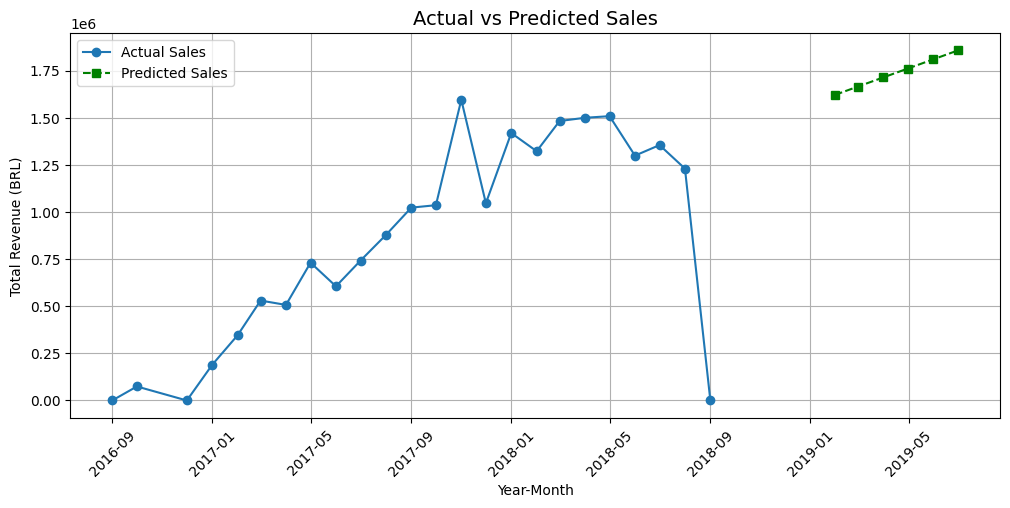

In [ ]:
# Predict sales for next 6 months
future_dates = pd.date_range(start="2019-01-01", periods=6, freq="ME")
future_dates_int = future_dates.astype(int) // 10**9

future_sales = model.predict(future_dates_int.to_numpy().reshape(-1, 1))


future_df = pd.DataFrame({"Date": future_dates, "Predicted Sales": future_sales})

plt.figure(figsize=(12, 5))
plt.plot(df_time_series["year_month"], df_time_series["payment_value"], label="Actual Sales", marker="o")
plt.plot(future_df["Date"], future_df["Predicted Sales"], label="Predicted Sales", marker="s", linestyle="--", color="green")

plt.title("Actual vs Predicted Sales", fontsize=14)
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue (BRL)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
